Iterations needed =  2


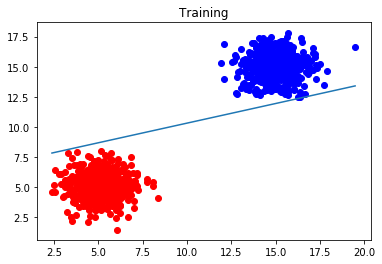

[ -0.78857913   2.41892181 -17.04720972]


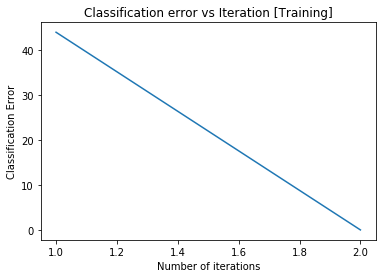

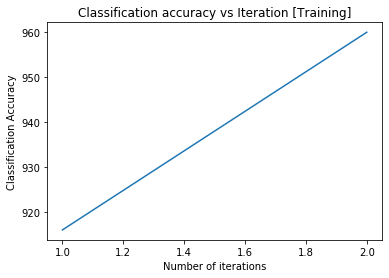

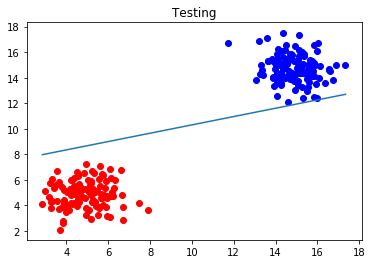

Classification accuracy =  240  out of n =  240
True +ve :  117
True -ve :  123
False +ve :  0
False -ve :  0


In [2]:
import matplotlib.pyplot as plt
import sys
import numpy as np

FEATURES = 2

def add(a, b, mul):
    i = 0
    for val in b:
        a[i] += (val * mul)
        i = i + 1
    return a

def perceptron(n, data, Y, alpha, N):
    global FEATURES
    wT = np.random.random(FEATURES + 1)
    error, okay = [], []
    correct, itr = 0, 0
    while (correct < n and itr < N):
        correct = 0
        itr += 1
        idx = 0
        for x in data:
            dotPro = np.dot(wT, x)
            if (dotPro > 0 and Y[idx] < 0):
                wT = add(wT, x, -1*alpha)
            elif (dotPro < 0 and Y[idx] > 0):
                wT = add(wT, x, alpha)
            else:
                correct += 1
            idx += 1
        error.append(n - correct)
        okay.append(correct)
    print("Iterations needed = ", itr)
    return wT, error, okay, itr


def readFile(val):
        i, n = 0, 0
        for arg in sys.argv[1:]:
            i = arg
        i = 1
        if val == 0:
            trn = open("dataset" + str(i) + "/Train" + str(i) + ".csv", "r")
        else:
            trn = open("dataset" + str(i) + "/Test" + str(i) + ".csv", "r")
        lines = trn.readlines()
        xx1, yy1, xx2, yy2, data, Y = [], [], [], [], [], []
        lx, rx = 10000.0, -1000.0
        for words in lines:
            n = n + 1
            temp = words.split(",")
            xx = [0, 0, 0]
            xx[0] = float(temp[0])
            xx[1] = float(temp[1])
            xx[2] = 1   # bias term!
            y = (int(2 * float(temp[2]) - 1))
            Y.append(y)
            data.append(xx)
            lx = min(lx, xx[0])
            rx = max(rx, xx[0])
            if (y == -1):
                xx1.append(xx[0])
                yy1.append(xx[1])
            else:
                xx2.append(xx[0])
                yy2.append(xx[1])
        trn.close()
        return xx1, yy1, xx2, yy2, data, Y, n, lx, rx


def drawLine(lx, rx, wT, xx1, yy1, xx2, yy2, val):
        x = np.linspace(lx, rx, 100)
        y = []
        # w0x0 + w1x1 + w2*1 = 0 => x1 = -(w0x0 + w2)/w1
        if wT[1] == 0:
           y = np.linspace(lx, rx, 100)
        else:
            m = -1 * wT[0]/wT[1]
            c = -1 * wT[2]/wT[1]
            for i in range(100):
                y.append(x[i] * m + c)
        plt.scatter(xx1, yy1, color="red")
        plt.scatter(xx2, yy2, color="blue")
        plt.plot(x, y)
        if val == 0:
            plt.title("Training")
        else:
            plt.title("Testing")
        plt.show()


def plotError(wT, error, okay, data, Y, itr, n):
        global FEATURES
        xx = np.linspace(1, itr, itr)
        plt.plot(xx, error)
        plt.title("Classification error vs Iteration [Training]")
        plt.xlabel("Number of iterations")
        plt.ylabel("Classification Error")
        plt.show()

        plt.plot(xx, okay)
        plt.xlabel("Number of iterations")
        plt.ylabel("Classification Accuracy")
        plt.title("Classification accuracy vs Iteration [Training]")
        plt.show()


def main():
        xx1, yy1, xx2, yy2, data, Y, n, lx, rx = readFile(0)
        wT, error, okay, itr = perceptron(n, data, Y, 0.8, 1000)
        # TRAINED NOW !
        drawLine(lx, rx, wT, xx1, yy1, xx2, yy2, 0)
        print(wT)
        plotError(wT, error, okay, data, Y, itr, n)

        # running ON TEST DATA for same i
        xx1, yy1, xx2, yy2, data, Y, n, lx, rx = readFile(1)
        drawLine(lx, rx, wT, xx1, yy1, xx2, yy2, 1)

        idx = 0
        truePos, trueNeg, falsePos, falseNeg = 0, 0, 0, 0
        for x in data:
            dotPro = 0.0
            # print(type(wT), type(x))
            for p in range(FEATURES + 1):
                dotPro += (wT[p] * x[p])
            if ((dotPro >= 0) and (Y[idx] > 0)):    # true +ve
                truePos += 1
            elif ((dotPro <= 0) and (Y[idx] < 0)): # true -ve
                trueNeg += 1
            elif ((dotPro <= 0) and (Y[idx] > 0)): # is pos, but classified -ve
                falseNeg += 1
            else:
                falsePos += 1
            idx += 1
        classAcc = (truePos + trueNeg)
        print("Classification accuracy = ", classAcc, " out of n = ", n)
        print("True +ve : ", truePos)
        print("True -ve : ", trueNeg)
        print("False +ve : ", falsePos)
        print("False -ve : ", falseNeg)

if __name__ == "__main__":
    main()


Iterations needed =  2


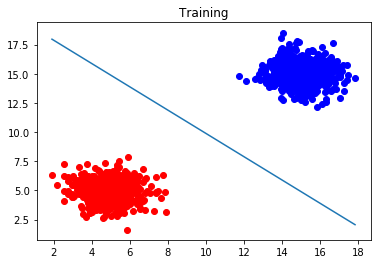

[  1.2905564    1.29087223 -25.6566333 ]


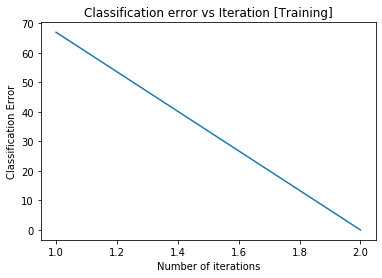

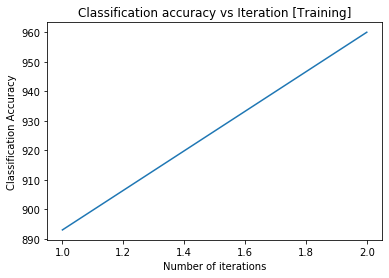

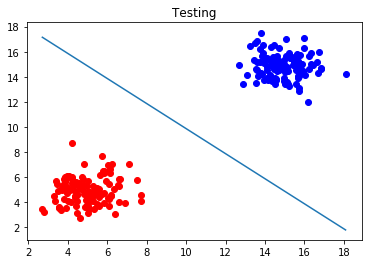

Classification accuracy =  240  out of n =  240
True +ve :  122
True -ve :  118
False +ve :  0
False -ve :  0


In [3]:
import matplotlib.pyplot as plt
import sys
import numpy as np

FEATURES = 2

def add(a, b, mul):
    i = 0
    for val in b:
        a[i] += (val * mul)
        i = i + 1
    return a

def perceptron(n, data, Y, alpha, N):
    global FEATURES
    wT = np.random.random(FEATURES + 1)
    error, okay = [], []
    correct, itr = 0, 0
    while (correct < n and itr < N):
        correct = 0
        itr += 1
        idx = 0
        for x in data:
            dotPro = np.dot(wT, x)
            if (dotPro > 0 and Y[idx] < 0):
                wT = add(wT, x, -1*alpha)
            elif (dotPro < 0 and Y[idx] > 0):
                wT = add(wT, x, alpha)
            else:
                correct += 1
            idx += 1
        error.append(n - correct)
        okay.append(correct)
    print("Iterations needed = ", itr)
    return wT, error, okay, itr


def readFile(val):
        i, n = 0, 0
        for arg in sys.argv[1:]:
            i = arg
        i = 2
        if val == 0:
            trn = open("dataset" + str(i) + "/Train" + str(i) + ".csv", "r")
        else:
            trn = open("dataset" + str(i) + "/Test" + str(i) + ".csv", "r")
        lines = trn.readlines()
        xx1, yy1, xx2, yy2, data, Y = [], [], [], [], [], []
        lx, rx = 10000.0, -1000.0
        for words in lines:
            n = n + 1
            temp = words.split(",")
            xx = [0, 0, 0]
            xx[0] = float(temp[0])
            xx[1] = float(temp[1])
            xx[2] = 1   # bias term!
            y = (int(2 * float(temp[2]) - 1))
            Y.append(y)
            data.append(xx)
            lx = min(lx, xx[0])
            rx = max(rx, xx[0])
            if (y == -1):
                xx1.append(xx[0])
                yy1.append(xx[1])
            else:
                xx2.append(xx[0])
                yy2.append(xx[1])
        trn.close()
        return xx1, yy1, xx2, yy2, data, Y, n, lx, rx


def drawLine(lx, rx, wT, xx1, yy1, xx2, yy2, val):
        x = np.linspace(lx, rx, 100)
        y = []
        # w0x0 + w1x1 + w2*1 = 0 => x1 = -(w0x0 + w2)/w1
        if wT[1] == 0:
           y = np.linspace(lx, rx, 100)
        else:
            m = -1 * wT[0]/wT[1]
            c = -1 * wT[2]/wT[1]
            for i in range(100):
                y.append(x[i] * m + c)
        plt.scatter(xx1, yy1, color="red")
        plt.scatter(xx2, yy2, color="blue")
        plt.plot(x, y)
        if val == 0:
            plt.title("Training")
        else:
            plt.title("Testing")
        plt.show()


def plotError(wT, error, okay, data, Y, itr, n):
        global FEATURES
        xx = np.linspace(1, itr, itr)
        plt.plot(xx, error)
        plt.title("Classification error vs Iteration [Training]")
        plt.xlabel("Number of iterations")
        plt.ylabel("Classification Error")
        plt.show()

        plt.plot(xx, okay)
        plt.xlabel("Number of iterations")
        plt.ylabel("Classification Accuracy")
        plt.title("Classification accuracy vs Iteration [Training]")
        plt.show()


def main():
        xx1, yy1, xx2, yy2, data, Y, n, lx, rx = readFile(0)
        wT, error, okay, itr = perceptron(n, data, Y, 0.8, 1000)
        # TRAINED NOW !
        drawLine(lx, rx, wT, xx1, yy1, xx2, yy2, 0)
        print(wT)
        plotError(wT, error, okay, data, Y, itr, n)

        # running ON TEST DATA for same i
        xx1, yy1, xx2, yy2, data, Y, n, lx, rx = readFile(1)
        drawLine(lx, rx, wT, xx1, yy1, xx2, yy2, 1)

        idx = 0
        truePos, trueNeg, falsePos, falseNeg = 0, 0, 0, 0
        for x in data:
            dotPro = 0.0
            # print(type(wT), type(x))
            for p in range(FEATURES + 1):
                dotPro += (wT[p] * x[p])
            if ((dotPro >= 0) and (Y[idx] > 0)):    # true +ve
                truePos += 1
            elif ((dotPro <= 0) and (Y[idx] < 0)): # true -ve
                trueNeg += 1
            elif ((dotPro <= 0) and (Y[idx] > 0)): # is pos, but classified -ve
                falseNeg += 1
            else:
                falsePos += 1
            idx += 1
        classAcc = (truePos + trueNeg)
        print("Classification accuracy = ", classAcc, " out of n = ", n)
        print("True +ve : ", truePos)
        print("True -ve : ", trueNeg)
        print("False +ve : ", falsePos)
        print("False -ve : ", falseNeg)

if __name__ == "__main__":
    main()


Iterations needed =  936


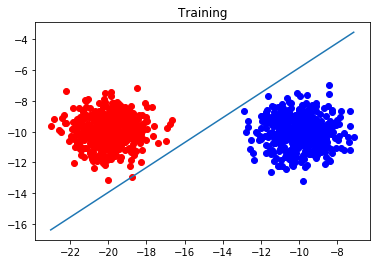

[ 146.97781723 -181.73117817  405.78327275]


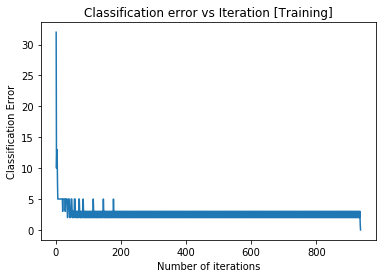

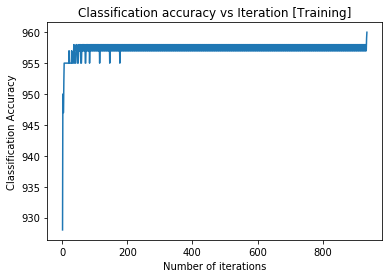

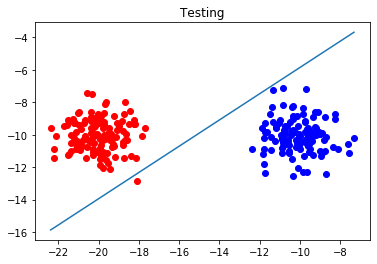

Classification accuracy =  239  out of n =  240
True +ve :  117
True -ve :  122
False +ve :  1
False -ve :  0


In [4]:
import matplotlib.pyplot as plt
import sys
import numpy as np

FEATURES = 2

def add(a, b, mul):
    i = 0
    for val in b:
        a[i] += (val * mul)
        i = i + 1
    return a

def perceptron(n, data, Y, alpha, N):
    global FEATURES
    wT = np.random.random(FEATURES + 1)
    error, okay = [], []
    correct, itr = 0, 0
    while (correct < n and itr < N):
        correct = 0
        itr += 1
        idx = 0
        for x in data:
            dotPro = np.dot(wT, x)
            if (dotPro > 0 and Y[idx] < 0):
                wT = add(wT, x, -1*alpha)
            elif (dotPro < 0 and Y[idx] > 0):
                wT = add(wT, x, alpha)
            else:
                correct += 1
            idx += 1
        error.append(n - correct)
        okay.append(correct)
    print("Iterations needed = ", itr)
    return wT, error, okay, itr


def readFile(val):
        i, n = 0, 0
        for arg in sys.argv[1:]:
            i = arg
        i = 3
        if val == 0:
            trn = open("dataset" + str(i) + "/Train" + str(i) + ".csv", "r")
        else:
            trn = open("dataset" + str(i) + "/Test" + str(i) + ".csv", "r")
        lines = trn.readlines()
        xx1, yy1, xx2, yy2, data, Y = [], [], [], [], [], []
        lx, rx = 10000.0, -1000.0
        for words in lines:
            n = n + 1
            temp = words.split(",")
            xx = [0, 0, 0]
            xx[0] = float(temp[0])
            xx[1] = float(temp[1])
            xx[2] = 1   # bias term!
            y = (int(2 * float(temp[2]) - 1))
            Y.append(y)
            data.append(xx)
            lx = min(lx, xx[0])
            rx = max(rx, xx[0])
            if (y == -1):
                xx1.append(xx[0])
                yy1.append(xx[1])
            else:
                xx2.append(xx[0])
                yy2.append(xx[1])
        trn.close()
        return xx1, yy1, xx2, yy2, data, Y, n, lx, rx


def drawLine(lx, rx, wT, xx1, yy1, xx2, yy2, val):
        x = np.linspace(lx, rx, 100)
        y = []
        # w0x0 + w1x1 + w2*1 = 0 => x1 = -(w0x0 + w2)/w1
        if wT[1] == 0:
           y = np.linspace(lx, rx, 100)
        else:
            m = -1 * wT[0]/wT[1]
            c = -1 * wT[2]/wT[1]
            for i in range(100):
                y.append(x[i] * m + c)
        plt.scatter(xx1, yy1, color="red")
        plt.scatter(xx2, yy2, color="blue")
        plt.plot(x, y)
        if val == 0:
            plt.title("Training")
        else:
            plt.title("Testing")
        plt.show()


def plotError(wT, error, okay, data, Y, itr, n):
        global FEATURES
        xx = np.linspace(1, itr, itr)
        plt.plot(xx, error)
        plt.title("Classification error vs Iteration [Training]")
        plt.xlabel("Number of iterations")
        plt.ylabel("Classification Error")
        plt.show()

        plt.plot(xx, okay)
        plt.xlabel("Number of iterations")
        plt.ylabel("Classification Accuracy")
        plt.title("Classification accuracy vs Iteration [Training]")
        plt.show()


def main():
        xx1, yy1, xx2, yy2, data, Y, n, lx, rx = readFile(0)
        wT, error, okay, itr = perceptron(n, data, Y, 0.8, 1000)
        # TRAINED NOW !
        drawLine(lx, rx, wT, xx1, yy1, xx2, yy2, 0)
        print(wT)
        plotError(wT, error, okay, data, Y, itr, n)

        # running ON TEST DATA for same i
        xx1, yy1, xx2, yy2, data, Y, n, lx, rx = readFile(1)
        drawLine(lx, rx, wT, xx1, yy1, xx2, yy2, 1)

        idx = 0
        truePos, trueNeg, falsePos, falseNeg = 0, 0, 0, 0
        for x in data:
            dotPro = 0.0
            # print(type(wT), type(x))
            for p in range(FEATURES + 1):
                dotPro += (wT[p] * x[p])
            if ((dotPro >= 0) and (Y[idx] > 0)):    # true +ve
                truePos += 1
            elif ((dotPro <= 0) and (Y[idx] < 0)): # true -ve
                trueNeg += 1
            elif ((dotPro <= 0) and (Y[idx] > 0)): # is pos, but classified -ve
                falseNeg += 1
            else:
                falsePos += 1
            idx += 1
        classAcc = (truePos + trueNeg)
        print("Classification accuracy = ", classAcc, " out of n = ", n)
        print("True +ve : ", truePos)
        print("True -ve : ", trueNeg)
        print("False +ve : ", falsePos)
        print("False -ve : ", falseNeg)

if __name__ == "__main__":
    main()


Iterations needed =  1000


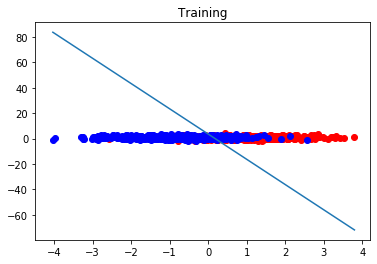

[-1.00767132 -0.0506335   0.18091992]


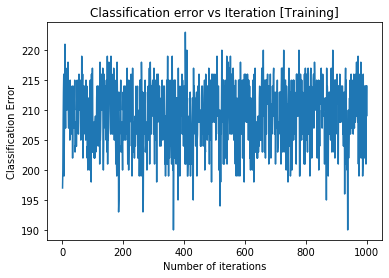

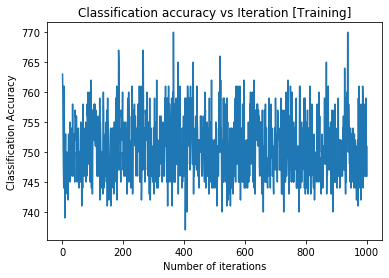

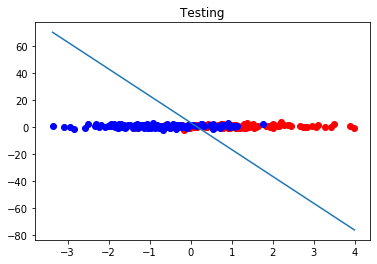

Classification accuracy =  194  out of n =  240
True +ve :  100
True -ve :  94
False +ve :  21
False -ve :  25


In [5]:
import matplotlib.pyplot as plt
import sys
import numpy as np

FEATURES = 2

def add(a, b, mul):
    i = 0
    for val in b:
        a[i] += (val * mul)
        i = i + 1
    return a

def perceptron(n, data, Y, alpha, N):
    global FEATURES
    wT = np.random.random(FEATURES + 1)
    error, okay = [], []
    correct, itr = 0, 0
    while (correct < n and itr < N):
        correct = 0
        itr += 1
        idx = 0
        for x in data:
            dotPro = np.dot(wT, x)
            if (dotPro > 0 and Y[idx] < 0):
                wT = add(wT, x, -1*alpha)
            elif (dotPro < 0 and Y[idx] > 0):
                wT = add(wT, x, alpha)
            else:
                correct += 1
            idx += 1
        error.append(n - correct)
        okay.append(correct)
    print("Iterations needed = ", itr)
    return wT, error, okay, itr


def readFile(val):
        i, n = 0, 0
        for arg in sys.argv[1:]:
            i = arg
        i = 4
        if val == 0:
            trn = open("dataset" + str(i) + "/Train" + str(i) + ".csv", "r")
        else:
            trn = open("dataset" + str(i) + "/Test" + str(i) + ".csv", "r")
        lines = trn.readlines()
        xx1, yy1, xx2, yy2, data, Y = [], [], [], [], [], []
        lx, rx = 10000.0, -1000.0
        for words in lines:
            n = n + 1
            temp = words.split(",")
            xx = [0, 0, 0]
            xx[0] = float(temp[0])
            xx[1] = float(temp[1])
            xx[2] = 1   # bias term!
            y = (int(2 * float(temp[2]) - 1))
            Y.append(y)
            data.append(xx)
            lx = min(lx, xx[0])
            rx = max(rx, xx[0])
            if (y == -1):
                xx1.append(xx[0])
                yy1.append(xx[1])
            else:
                xx2.append(xx[0])
                yy2.append(xx[1])
        trn.close()
        return xx1, yy1, xx2, yy2, data, Y, n, lx, rx


def drawLine(lx, rx, wT, xx1, yy1, xx2, yy2, val):
        x = np.linspace(lx, rx, 100)
        y = []
        # w0x0 + w1x1 + w2*1 = 0 => x1 = -(w0x0 + w2)/w1
        if wT[1] == 0:
           y = np.linspace(lx, rx, 100)
        else:
            m = -1 * wT[0]/wT[1]
            c = -1 * wT[2]/wT[1]
            for i in range(100):
                y.append(x[i] * m + c)
        plt.scatter(xx1, yy1, color="red")
        plt.scatter(xx2, yy2, color="blue")
        plt.plot(x, y)
        if val == 0:
            plt.title("Training")
        else:
            plt.title("Testing")
        plt.show()


def plotError(wT, error, okay, data, Y, itr, n):
        global FEATURES
        xx = np.linspace(1, itr, itr)
        plt.plot(xx, error)
        plt.title("Classification error vs Iteration [Training]")
        plt.xlabel("Number of iterations")
        plt.ylabel("Classification Error")
        plt.show()

        plt.plot(xx, okay)
        plt.xlabel("Number of iterations")
        plt.ylabel("Classification Accuracy")
        plt.title("Classification accuracy vs Iteration [Training]")
        plt.show()


def main():
        xx1, yy1, xx2, yy2, data, Y, n, lx, rx = readFile(0)
        wT, error, okay, itr = perceptron(n, data, Y, 0.8, 1000)
        # TRAINED NOW !
        drawLine(lx, rx, wT, xx1, yy1, xx2, yy2, 0)
        print(wT)
        plotError(wT, error, okay, data, Y, itr, n)

        # running ON TEST DATA for same i
        xx1, yy1, xx2, yy2, data, Y, n, lx, rx = readFile(1)
        drawLine(lx, rx, wT, xx1, yy1, xx2, yy2, 1)

        idx = 0
        truePos, trueNeg, falsePos, falseNeg = 0, 0, 0, 0
        for x in data:
            dotPro = 0.0
            # print(type(wT), type(x))
            for p in range(FEATURES + 1):
                dotPro += (wT[p] * x[p])
            if ((dotPro >= 0) and (Y[idx] > 0)):    # true +ve
                truePos += 1
            elif ((dotPro <= 0) and (Y[idx] < 0)): # true -ve
                trueNeg += 1
            elif ((dotPro <= 0) and (Y[idx] > 0)): # is pos, but classified -ve
                falseNeg += 1
            else:
                falsePos += 1
            idx += 1
        classAcc = (truePos + trueNeg)
        print("Classification accuracy = ", classAcc, " out of n = ", n)
        print("True +ve : ", truePos)
        print("True -ve : ", trueNeg)
        print("False +ve : ", falsePos)
        print("False -ve : ", falseNeg)

if __name__ == "__main__":
    main()


In [ ]:
# Dataset 4 is not linearly separable